## Introduction to PyTorch [Hands On]

- PyTorch has lots of nice features that can really help us train deep learning models quickly. 
- We've just walked through a set of examples where we've progressively added more and more nice PyTorch modeles, and relied less and less on our "manually implemented" methods in Numpy.
- A great way get some hands on experience with each of the great PyTorch modules is to **take them away**. 
- In this interactive session, we'll work backwards from a nice, concise and simple neural network. At each step I'll take away one nice PyTorch feature, and your job is to re-implement the same algorithm without the feature. This exercise will help build your comfort with the library.  

## 0. Imports and Data

In [7]:
import numpy as np
from matplotlib.pyplot import *

import torch
from torch import optim
from torch import nn

In [8]:
# X = (hours sleeping, hours studying), y = Score on test
X = torch.tensor(([3,5], [5,1], [10,2], [6,1.5]), dtype=torch.float)
y = torch.tensor(([75], [82], [93], [70]), dtype=torch.float)

max_values, max_indices = torch.max(X, dim=0) #Normalize Data
X = X/max_values
y = y/100 #Max test score is 100

## 1. Baseline with nn.Sequential

In [9]:
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1

model = nn.Sequential(nn.Linear(inputLayerSize, hiddenLayerSize),
                       nn.Sigmoid(), 
                       nn.Linear(hiddenLayerSize, outputLayerSize),
                       nn.Sigmoid())

In [10]:
num_iterations = 1000; lr = 1e-2; losses = []

opt = optim.SGD(model.parameters(), lr=lr) #pass in the parameters we want to optimize. 
for i in range(num_iterations):
    yhat = model(X)
    loss = torch.sum(0.5*(y-yhat)**2)
    loss.backward() #Compute Gradients
    
    opt.step() #Take a gradient descent "step", note that we no longer need torch.no_grad() here.
    opt.zero_grad()
    losses.append(loss.item())

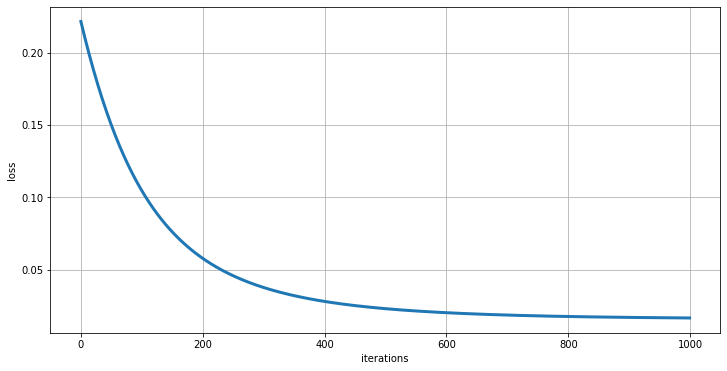

In [11]:
fig = figure(0, (12,6))
plot(losses, linewidth = 3); grid(1); xlabel('iterations'); ylabel('loss');

## 2. [Interactive] Create + Train the Same Model Without nn.Sequential

In [ ]:
class Neural_Network_Torch(nn.Module):
    def __init__(self, inputLayerSize = 2, outputLayerSize = 1, hiddenLayerSize = 3):        
        super().__init__()
        #Your Code here, 
        #self.lin1 = nn.Linear(...

        
    def forward(self, X):
        #Your Code here


In [ ]:
NT = Neural_Network_Torch()

In [ ]:
num_iterations = 1000; lr = 1e-2; losses = []

opt = optim.SGD(model.parameters(), lr=lr) #pass in the parameters we want to optimize. 
for i in range(num_iterations):
    yhat = model(X)
    loss = torch.sum(0.5*(y-yhat)**2)
    loss.backward() #Compute Gradients
    
    opt.step() #Take a gradient descent "step", note that we no longer need torch.no_grad() here.
    opt.zero_grad()
    losses.append(loss.item())

In [ ]:
fig = figure(0, (12,6))
plot(losses, linewidth = 3); grid(1); xlabel('iterations'); ylabel('loss');

## 3. [Interactive] Train the Same Model Without torch.optim

In [ ]:
num_iterations = 1000; lr = 1e-2; losses = []

for i in range(num_iterations):
    yhat = NT(X)
    loss = torch.sum(0.5*(y-yhat)**2)
    loss.backward() #Compute Gradients
    
    #Your Gradient Descent Code Here
    
    
    losses.append(loss.item())

In [ ]:
fig = figure(0, (12,6))
plot(losses, linewidth = 3); grid(1); xlabel('iterations'); ylabel('loss');

## 4. [Interactive]  Build and Train the Same Model Without torch.Layers

In [ ]:
class Neural_Network_Torch(nn.Module):
    def __init__(self, inputLayerSize = 2, outputLayerSize = 1, hiddenLayerSize = 3):        
        super().__init__()
        #Your Code Here
        #self.W1 = nn.Parameter(...
        
    def forward(self, X):
        #Your Code Here

In [ ]:
NT = Neural_Network_Torch()

In [ ]:
num_iterations = 1000; lr = 1e-2; losses = []

for i in range(num_iterations):
    yhat = NT(X)
    loss = torch.sum(0.5*(y-yhat)**2)
    loss.backward() #Compute Gradients
    
    #Your Gradient Descent Code Here
    
    
    losses.append(loss.item())

In [ ]:
fig = figure(0, (12,6))
plot(losses, linewidth = 3); grid(1); xlabel('iterations'); ylabel('loss');

## 5. [Interactive] Build and Train the Same Network Without nn.Module

In [ ]:
class Neural_Network_Torch(object):
    def __init__(self, inputLayerSize = 2, outputLayerSize = 1, hiddenLayerSize = 3):        
        #Your Code Hhere
        #self.W1 = torch.randn(...
        
    def forward(self, X):
        #Your Code Here
        #self.z2 = torch.mm(...
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+torch.exp(-z))

In [ ]:
NT = Neural_Network_Torch()

In [ ]:
num_iterations = 1000; lr = 1e-2; losses = []

for i in range(num_iterations):
    yhat = NT(X)
    loss = torch.sum(0.5*(y-yhat)**2)
    loss.backward() #Compute Gradients
    
    #Your Gradient Descent Code Here
    
    
    losses.append(loss.item())

In [ ]:
fig = figure(0, (12,6))
plot(losses, linewidth = 3); grid(1); xlabel('iterations'); ylabel('loss');

## 6. [Interactive Advanced] Implement Weight Decay Regularization In PyTorch for This Model and Train